In [75]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng

In [76]:
def population(N, M, value=1):
    lattice = (value, (N,M))
    return np.full((N, M), value)

In [77]:
def plotpop(population, left=0, right=0, bottom=0, top=0): #add value to axes
    fig, ax = plt.subplots()
    im = ax.imshow(population, cmap = 'ocean', extent = (left, np.shape(population)[0]+right, np.shape(population)[1]+bottom, top))
    return im

A normal population is going to be 1s, immunized will be 0s, infected will be -1s

In [78]:
def randomperson(population):
    #make one variable x the width of the lattice: x = np.shape(lattice)[0]
    #make one variable y the height of the lattice: y = np.shape(lattice)[1]
    #rn_x is a random integer from 0 to x: rn_x = rng.randint(0,x)
    #rn_y is a random integer from 0 to y: rn_y = rng.randint(0,y)
    #define (rn_x, rn_y) in lattice: particle = lattice[rn_x, rn_y]
    x = np.shape(population)[0]
    y = np.shape(population)[1]
    rn_x = rng.randint(0,x)
    rn_y = rng.randint(0,y)
    person = (rn_x, rn_y)
    return person

In [79]:
def immunize(population, person):
    new_val = 0
    population[person] = new_val
    return population

In [80]:
def percimmune(perc, population):
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    popdim = N * M
    numimmune = int(perc * popdim)
    i = 0
    while i < numimmune:
        r = randomperson(population)
        while population[r] == 0:
            r = randomperson(population)
        population = immunize(population, r)
        i += 1
    return population

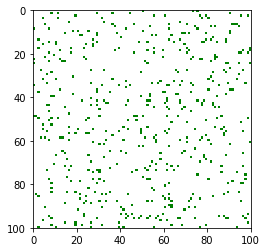

In [81]:
p = population(100,100)
newp = percimmune(.05, p)
plotpop(newp)

In [82]:
def infect(population, person):
    val = population[person]
    new_val = ((val**2) * -1)    #if val is 0, this will return 0; if it is either 1 or -1, it will return -1
    population[person] = new_val
    return population

In [158]:
def infectneighbors(population, iterations = 1):
    pop_original = population
    
    bound_x = np.shape(population)[0] - 1
    bound_y = np.shape(population)[1] - 1
    
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    
    i = 0
    j = 0
    
    while i < N:
        while j < M:
            cell = (i, j)
            if pop_original[cell] == -1:
                if i == 0:
                    person = (i+1, j)
                    population = infect(population, person)
                elif i == bound_x:
                    person = (i-1, j)
                    population = infect(population, person)
                else: #i in between
                    person1 = (i-1, j)
                    population = infect(population, person1)
                    person2 = i+1, j
                    population = infect(population, person2)
                if j == 0:
                    person = (i, j+1)
                    population = infect(population, person)
                elif j == bound_y:
                    person = (i, j-1)
                    population = infect(population, person)
                else: #j in between
                    person1 = (i, j-1)
                    population = infect(population, person1)
                    person2 = (i, j+1)
                    population = infect(population, person2)
            j += 1
        i += 1
    plotpop(population)
    return population

array([[ 1,  1,  0,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  0,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  0,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [-1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  0,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

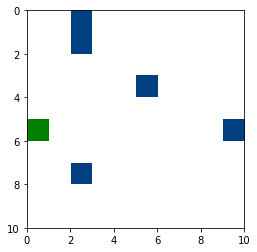

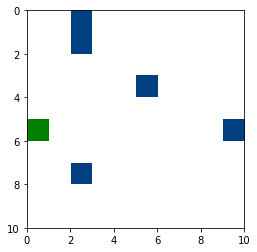

In [159]:
p = population(10,10)
percimmune(.05, p)
newp = infect(p, (5, 0))
plotpop(newp)
infectneighbors(newp)